In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Scraping the data for the top 50 run scorers from 1st Jan 2014

In [3]:
req = requests.get('https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;spanmin1=1+jan+2014;spanval1=span;template=results;type=batting').text

In [4]:
soup = BeautifulSoup(req)

In [5]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<!-- hostname: web004, edition-view: , country: unknown, cluster: www, created: 2020-06-11 17:08:09 --><html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<script type="text/javascript">var _sf_startpt=(new Date()).getTime()</script>
<meta content="ZxdgH3XglRg0Bsy-Ho2RnO3EE4nRs53FloLS6fkt_nc" name="google-site-verification"/>
<title>Batting records | One-Day Internationals | Cricinfo Statsguru | ESPNcricinfo.com</title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="" name="keywords"/>
<meta content="" name="description"/>
<!--[if IE 9]>
<script language="javascript" type="text/javascript">
function fnCreateJumpList(iScenario) {
fnClearJumpList();
window.external.msSiteModeCreateJumpList("Quick Links")
window.external.msSiteModeAddJumpListI

In [6]:
div_ = soup.find('div',class_='pnl650M')

In [7]:
table = soup.find_all('table',class_='engineTable')

In [8]:
data = table[2]

In [9]:
data

<table class="engineTable">
<caption>Overall figures</caption>
<thead>
<tr class="headlinks">
<th class="left" nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=player;spanmin1=1+jan+2014;spanval1=span;template=results;type=batting" title="sort by player name">Player</a></th>
<th class="left" nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=start;spanmin1=1+jan+2014;spanval1=span;template=results;type=batting" title="sort by start date">Span</a></th>
<th nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=matches;spanmin1=1+jan+2014;spanval1=span;template=results;type=batting" title="sort by matches played">Mat</a></th>
<th nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?class=2;orderby=innings;spanmin1=1+jan+2014;spanval1=span;template=results;type=batting" title="sort by innings batted">Inns</a></th>
<th nowrap=""><a class="black-link" href="/ci/engine/stats/index.html?cla

In [10]:
for row in data.find_all('tr'):
        for cell in row.find_all('td'):
            print(cell.text)

V Kohli (INDIA)
2014-2020
123
121
21
6713
160*
67.13
6925
96.93
26
30
4
613
81

RG Sharma (INDIA)
2014-2020
110
109
12
5941
264
61.24
6232
95.33
25
23
5
561
191

JE Root (ENG)
2014-2020
126
118
18
5296
133*
52.96
6013
88.07
16
29
3
427
39

KS Williamson (NZ)
2014-2020
104
102
8
4898
148
52.10
5900
83.01
10
33
1
461
41

LRPL Taylor (NZ)
2014-2020
103
99
23
4656
181*
61.26
5476
85.02
13
27
2
394
46

S Dhawan (INDIA)
2014-2020
105
103
5
4457
143
45.47
4740
94.02
12
24
3
560
59

F du Plessis (SA)
2014-2019
96
91
15
4405
185
57.96
4896
89.97
12
28
3
398
53

Q de Kock (SA)
2014-2020
105
105
6
4394
178
44.38
4558
96.40
11
25
4
510
65

AJ Finch (AUS)
2014-2020
108
105
3
4368
153*
42.82
4945
88.33
15
24
10
418
107

MJ Guptill (NZ)
2014-2020
107
106
10
4286
237*
44.64
4722
90.76
12
20
9
440
126

EJG Morgan (ENG)
2014-2020
129
118
11
4203
148
39.28
4408
95.34
8
27
9
345
146

DA Warner (AUS)
2014-2020
84
83
6
4134
179
53.68
4094
100.97
16
15
1
441
69

HM Amla (SA)
2014-2019
96
96
8
4059
159
46.12


# Writing the data collected to a csv

In [11]:
with open ('players_2014.csv','w') as r:
    for row in data.find_all('tr'):
        for cell in row.find_all('td'):
            r.write(cell.text.ljust(22))
            r.write(',')
        r.write('\n')

In [12]:
df = pd.read_csv('players_2014.csv',header=None)

In [13]:
df.drop([15,16],axis=1,inplace=True)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,V Kohli (INDIA),2014-2020,123,121,21,6713,160*,67.13,6925,96.93,26,30,4,613,81
1,RG Sharma (INDIA),2014-2020,110,109,12,5941,264,61.24,6232,95.33,25,23,5,561,191
2,JE Root (ENG),2014-2020,126,118,18,5296,133*,52.96,6013,88.07,16,29,3,427,39
3,KS Williamson (NZ),2014-2020,104,102,8,4898,148,52.10,5900,83.01,10,33,1,461,41
4,LRPL Taylor (NZ),2014-2020,103,99,23,4656,181*,61.26,5476,85.02,13,27,2,394,46


In [15]:
columns = ['name','duration','matches','inns','NO','runs','highest','average','BF','SR','100','50','0','4s','6s']

In [16]:
df.columns = columns

In [17]:
df.head()

,name,duration,matches,inns,NO,runs,highest,average,BF,SR,100,50,0,4s,6s
0,V Kohli (INDIA),2014-2020,123,121,21,6713,160*,67.13,6925,96.93,26,30,4,613,81
1,RG Sharma (INDIA),2014-2020,110,109,12,5941,264,61.24,6232,95.33,25,23,5,561,191
2,JE Root (ENG),2014-2020,126,118,18,5296,133*,52.96,6013,88.07,16,29,3,427,39
3,KS Williamson (NZ),2014-2020,104,102,8,4898,148,52.10,5900,83.01,10,33,1,461,41
4,LRPL Taylor (NZ),2014-2020,103,99,23,4656,181*,61.26,5476,85.02,13,27,2,394,46


Text(0, 0.5, 'Average')

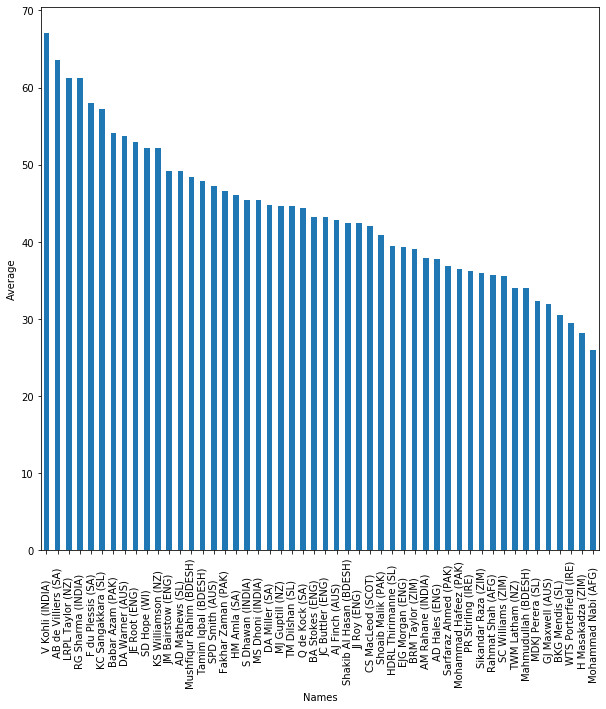

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
df.groupby('name')['average'].sum().sort_values(ascending=False).plot.bar()
plt.xlabel('Names')
plt.ylabel('Average')

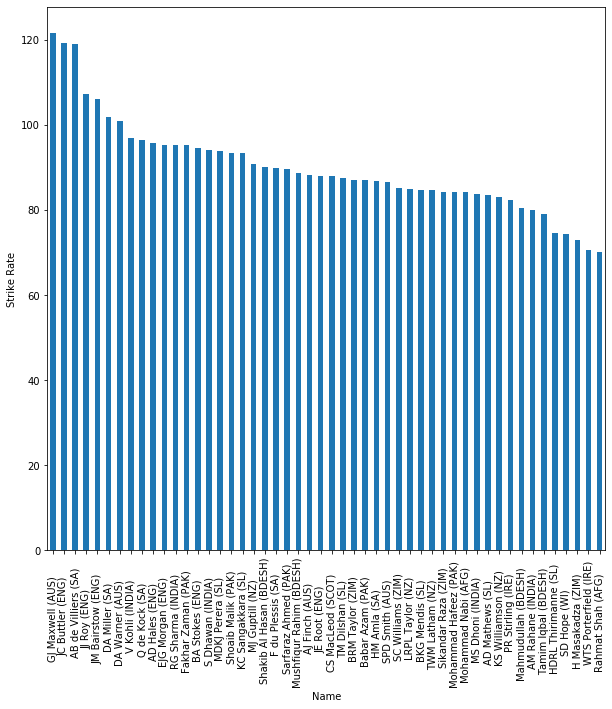

In [19]:
plt.figure(figsize=(10,10))
df.groupby('name')['SR'].sum().sort_values(ascending=False).plot.bar()
plt.xlabel('Name')
plt.ylabel('Strike Rate')
plt.show()

In [78]:
players = list(df.name.values)

In [79]:
averages = list(df.average.values)

In [80]:
strike_rates = list(df.SR.values)

In [81]:
df

,name,duration,matches,inns,NO,runs,highest,average,BF,SR,100,50,0,4s,6s,win_avg,win_str,big_score_pts,weighted_avg,weighted_str,scaled_avg,scaled_str,score
0,V Kohli (INDIA),2014-2020,123,121,21,6713,160*,67.13,6925,96.93,26,30,4,613,81,86.83,98.00,0.005601,98.6875,109.71500,1.000000,0.434093,47.509898
1,RG Sharma (INDIA),2014-2020,110,109,12,5941,264,61.24,6232,95.33,25,23,5,561,191,71.86,98.00,0.006144,84.5150,108.91500,0.739871,0.420879,38.507490
2,JE Root (ENG),2014-2020,126,118,18,5296,133*,52.96,6013,88.07,16,29,3,427,39,67.74,92.00,0.004381,77.2850,101.53500,0.607167,0.298976,30.047300
3,KS Williamson (NZ),2014-2020,104,102,8,4898,148,52.10,5900,83.01,10,33,1,461,41,59.33,84.00,0.005094,70.5475,94.00500,0.483504,0.174595,21.885382
4,LRPL Taylor (NZ),2014-2020,103,99,23,4656,181*,61.26,5476,85.02,13,27,2,394,46,78.50,89.00,0.005408,89.5050,98.13500,0.831460,0.242815,35.629503
5,S Dhawan (INDIA),2014-2020,105,103,5,4457,143,45.47,4740,94.02,12,24,3,560,59,49.46,98.00,0.004524,59.8300,108.26000,0.286789,0.410059,23.145318
6,F du Plessis (SA),2014-2019,96,91,15,4405,185,57.96,4896,89.97,12,28,3,398,53,69.17,93.00,0.006279,80.8575,103.11000,0.672739,0.324992,33.132334
7,Q de Kock (SA),2014-2020,105,105,6,4394,178,44.38,4558,96.40,11,25,4,510,65,50.95,101.00,0.004263,60.4025,111.32500,0.297297,0.460687,25.154167
8,AJ Finch (AUS),2014-2020,108,105,3,4368,153*,42.82,4945,88.33,15,24,10,418,107,50.00,90.00,0.004898,58.9100,100.41500,0.269903,0.280476,18.324136
9,MJ Guptill (NZ),2014-2020,107,106,10,4286,237*,44.64,4722,90.76,12,20,9,440,126,57.25,94.88,0.003916,65.2575,104.68000,0.386408,0.350925,24.461233


In [82]:
win_str = list(df['win_str'].values)

In [83]:
win_avg = list(df['win_avg'].values)

In [84]:
player_avg = {}
for player,average in zip(players,averages):
    player_avg[player] = average

In [85]:
player_win_avg = {}
for player,win_avgs in zip(players,win_avg):
    player_win_avg[player] = win_avgs

In [86]:
player_str = {}
for player,sr in zip(players,strike_rates):
    player_str[player] = sr

In [87]:
player_win_str = {}
for player,sr in zip(players,win_str):
    player_win_str[player] = sr

In [88]:
# plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

In [89]:
sorted_avg = sorted(player_avg,key=player_avg.get,reverse=True)


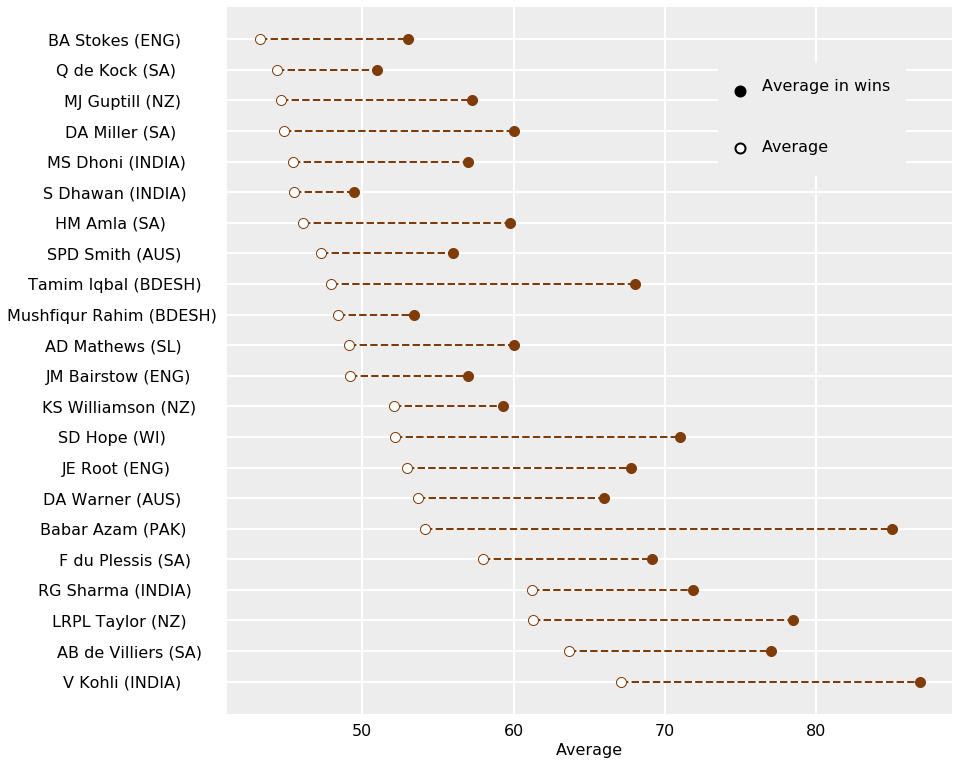

In [90]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# get colours
colors = plt.get_cmap('PuOr',2)
yval = 0

for player in sorted_avg[0:22]:
    if player_win_avg[player] > player_avg[player]:
        fillcolor = colors(0)
    else:
        fillcolor = colors(1)
    
    ax.plot([player_avg[player],player_win_avg[player]],[yval,yval],linestyle='--',linewidth=2,color=fillcolor)
    ax.plot(player_avg[player],yval,'o',markersize=10,color='white',markeredgecolor=fillcolor)
    ax.plot(player_win_avg[player],yval,'o',color=fillcolor,markersize=10)
    yval += 1

plt.yticks(np.arange(22))
ax.set_yticklabels(sorted_avg[0:22])

leg = fig.add_axes([0.65,0.7,0.2,0.12])
leg.plot([0],[1],'o',color='black',markersize=10,markeredgewidth=2)
leg.text(0.3,1,'Average in wins')
leg.plot([0], [0], 'o', color='white', markeredgecolor='black', markeredgewidth=2, markersize=10)
leg.text(0.3, 0, 'Average', ha='left', va='center')
leg.set_xticks([])
leg.set_yticks([])
leg.set_xlim(-0.3, 2.3)
leg.set_ylim(-0.5, 1.5)

ax.grid(color='white',linewidth=2)

ax.set_xlabel('Average')
plt.show()

# importing excel file with avg and str in wins collected from espn cricinfo

In [91]:
new_col  = pd.read_excel('avg_str.xlsx',header=None)

In [92]:
new_col.columns  =['win_avg','win_str']

In [93]:
df  =  df.iloc[0:35]

In [94]:
df  =pd.concat([df,new_col],axis=1)

In [95]:
# setting the options to display all columns of a dataframe
pd.set_option('display.max_columns',None)

In [96]:
df

,name,duration,matches,inns,NO,runs,highest,average,BF,SR,100,50,0,4s,6s,win_avg,win_str,big_score_pts,weighted_avg,weighted_str,scaled_avg,scaled_str,score,win_avg,win_str
0,V Kohli (INDIA),2014-2020,123,121,21,6713,160*,67.13,6925,96.93,26,30,4,613,81,86.83,98.00,0.005601,98.6875,109.71500,1.000000,0.434093,47.509898,86.83,98.00
1,RG Sharma (INDIA),2014-2020,110,109,12,5941,264,61.24,6232,95.33,25,23,5,561,191,71.86,98.00,0.006144,84.5150,108.91500,0.739871,0.420879,38.507490,71.86,98.00
2,JE Root (ENG),2014-2020,126,118,18,5296,133*,52.96,6013,88.07,16,29,3,427,39,67.74,92.00,0.004381,77.2850,101.53500,0.607167,0.298976,30.047300,67.74,92.00
3,KS Williamson (NZ),2014-2020,104,102,8,4898,148,52.10,5900,83.01,10,33,1,461,41,59.33,84.00,0.005094,70.5475,94.00500,0.483504,0.174595,21.885382,59.33,84.00
4,LRPL Taylor (NZ),2014-2020,103,99,23,4656,181*,61.26,5476,85.02,13,27,2,394,46,78.50,89.00,0.005408,89.5050,98.13500,0.831460,0.242815,35.629503,78.50,89.00
5,S Dhawan (INDIA),2014-2020,105,103,5,4457,143,45.47,4740,94.02,12,24,3,560,59,49.46,98.00,0.004524,59.8300,108.26000,0.286789,0.410059,23.145318,49.46,98.00
6,F du Plessis (SA),2014-2019,96,91,15,4405,185,57.96,4896,89.97,12,28,3,398,53,69.17,93.00,0.006279,80.8575,103.11000,0.672739,0.324992,33.132334,69.17,93.00
7,Q de Kock (SA),2014-2020,105,105,6,4394,178,44.38,4558,96.40,11,25,4,510,65,50.95,101.00,0.004263,60.4025,111.32500,0.297297,0.460687,25.154167,50.95,101.00
8,AJ Finch (AUS),2014-2020,108,105,3,4368,153*,42.82,4945,88.33,15,24,10,418,107,50.00,90.00,0.004898,58.9100,100.41500,0.269903,0.280476,18.324136,50.00,90.00
9,MJ Guptill (NZ),2014-2020,107,106,10,4286,237*,44.64,4722,90.76,12,20,9,440,126,57.25,94.88,0.003916,65.2575,104.68000,0.386408,0.350925,24.461233,57.25,94.88


In [ ]:
df.drop(['los_avg','importance'],axis=1,inplace=True)

In [34]:
df.loc[12,'win_avg'] = 59.79

In [ ]:
df

In [35]:
df['big_score_pts'] = (df['50']*1+df['100']*2)/df['inns']

In [36]:
df['weighted_avg'] = (df['win_avg']*1.5+df['average'])/2

In [37]:
df['weighted_str'] = (df['win_str']*1.25+df['SR'])/2

In [38]:
df['big_score_pts'] = df['big_score_pts']/df['inns']

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['weighted_avg','weighted_str']])

In [41]:
scaled_ = pd.DataFrame(scaled,columns = ['scaled_avg','scaled_str'])

In [42]:
df = pd.concat([df,scaled_],axis=1)

In [43]:
df['score'] = df['scaled_avg'] + df['scaled_str'] + df['big_score_pts']

In [44]:
df['score']  =df['score']*33

In [98]:
scores

{'V Kohli (INDIA)       ': array([47.50989777]),
 'AB de Villiers (SA)   ': array([59.6825269]),
 'LRPL Taylor (NZ)      ': array([35.62950344]),
 'RG Sharma (INDIA)     ': array([38.50748954]),
 'F du Plessis (SA)     ': array([33.13233425]),
 'Babar Azam (PAK)      ': array([36.71292758]),
 'DA Warner (AUS)       ': array([36.47818129]),
 'JE Root (ENG)         ': array([30.04730018]),
 'SD Hope (WI)          ': array([21.50403269]),
 'KS Williamson (NZ)    ': array([21.88538157]),
 'JM Bairstow (ENG)     ': array([34.82954897]),
 'AD Mathews (SL)       ': array([23.43268513]),
 'Mushfiqur Rahim (BDESH)': array([24.19379754]),
 'Tamim Iqbal (BDESH)   ': array([23.16356854]),
 'SPD Smith (AUS)       ': array([21.62323112]),
 'HM Amla (SA)          ': array([22.07531649]),
 'S Dhawan (INDIA)      ': array([23.14531762]),
 'MS Dhoni (INDIA)      ': array([21.31937565]),
 'DA Miller (SA)        ': array([35.29115537]),
 'MJ Guptill (NZ)       ': array([24.46123259]),
 'Q de Kock (SA)    

In [97]:
scores = {}
for player in sorted_avg[0:21]:
    scores[player] = df.loc[df.name==player,'score'].values

In [ ]:
for key in list(scores.keys()):
    key = key.rstrip()

In [ ]:
df.loc[df.name=='V Kohli','score']

In [54]:
scores = list(df.score.values)

In [55]:
scores_dict = {}
for player,score in zip(players,scores):
    scores_dict[player] = score

In [52]:
players
modified_names = {}
for player in players:
    words = player.rstrip().split(' ')
    modified_names[player] = words[0][0] +' '+ words[-2]

In [59]:
modified_names

{'V Kohli (INDIA)       ': 'V Kohli',
 'RG Sharma (INDIA)     ': 'R Sharma',
 'JE Root (ENG)         ': 'J Root',
 'KS Williamson (NZ)    ': 'K Williamson',
 'LRPL Taylor (NZ)      ': 'R. Taylor',
 'S Dhawan (INDIA)      ': 'S Dhawan',
 'F du Plessis (SA)     ': 'F Plessis',
 'Q de Kock (SA)        ': 'Q Kock',
 'AJ Finch (AUS)        ': 'A Finch',
 'MJ Guptill (NZ)       ': 'M Guptill',
 'EJG Morgan (ENG)      ': 'E Morgan',
 'DA Warner (AUS)       ': 'D Warner',
 'HM Amla (SA)          ': 'H Amla',
 'SPD Smith (AUS)       ': 'S Smith',
 'Mushfiqur Rahim (BDESH)': 'M Rahim',
 'JC Buttler (ENG)      ': 'J Buttler',
 'AD Mathews (SL)       ': 'A Mathews',
 'Tamim Iqbal (BDESH)   ': 'T Iqbal',
 'JJ Roy (ENG)          ': 'J Roy',
 'Babar Azam (PAK)      ': 'B Azam',
 'SD Hope (WI)          ': 'S Hope',
 'AB de Villiers (SA)   ': 'ABD',
 'MS Dhoni (INDIA)      ': 'M Dhoni',
 'JM Bairstow (ENG)     ': 'J Bairstow',
 'Shakib Al Hasan (BDESH)': 'S Hasan',
 'Sikandar Raza (ZIM)   ': 'S Raza',


In [60]:
player_str

NameError: name 'player_str' is not defined

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


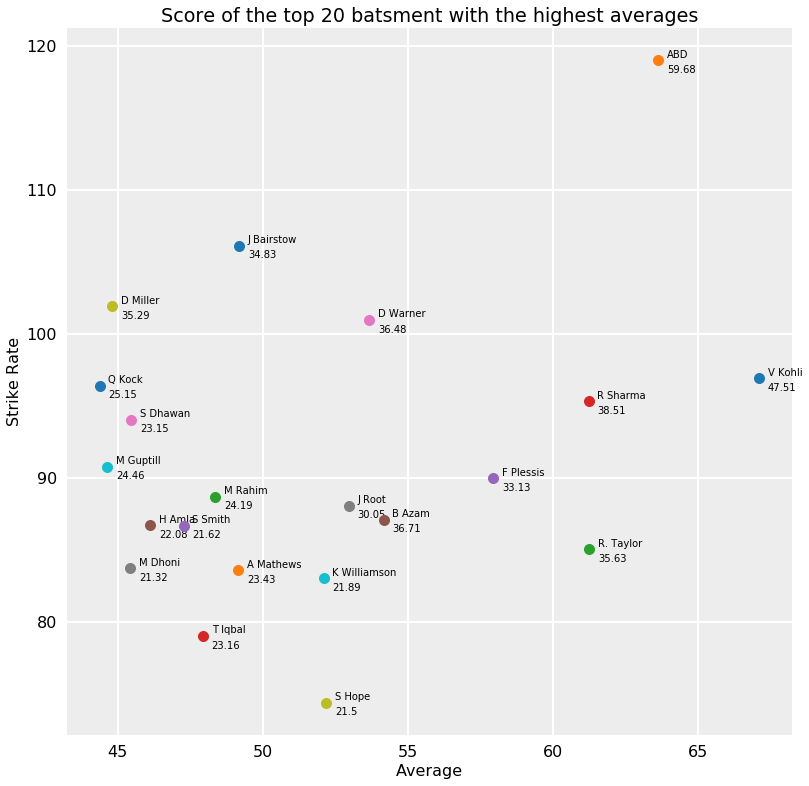

In [99]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

for player in sorted_avg[0:21]:
    
    ax.plot(player_avg[player],player_str[player],'o',markersize=10,zorder=3)
    ax.text(player_avg[player]+0.3,player_str[player]+0.05,modified_names[player],ha='left',va='bottom',size=10,zorder=2)
    ax.text(player_avg[player]+0.3,player_str[player]-1,round(scores_dict[player],2),ha='left',va='bottom',size=10,zorder=2)
    
ax.grid(color='white',linewidth=2)

ax.set_xlabel('Average')
ax.set_ylabel('Strike Rate')

plt.title('Score of the top 20 batsment with the highest averages')

plt.show()



In [62]:
modified_names['AB de Villiers (SA)   '] = 'ABD'
modified_names['LRPL Taylor (NZ)      '] = 'R. Taylor'

In [71]:
df

,name,duration,matches,inns,NO,runs,highest,average,BF,SR,100,50,0,4s,6s,win_avg,win_str,big_score_pts,weighted_avg,weighted_str,scaled_avg,scaled_str,score
0,V Kohli (INDIA),2014-2020,123,121,21,6713,160*,67.13,6925,96.93,26,30,4,613,81,86.83,98.00,0.005601,98.6875,109.71500,1.000000,0.434093,47.509898
1,RG Sharma (INDIA),2014-2020,110,109,12,5941,264,61.24,6232,95.33,25,23,5,561,191,71.86,98.00,0.006144,84.5150,108.91500,0.739871,0.420879,38.507490
2,JE Root (ENG),2014-2020,126,118,18,5296,133*,52.96,6013,88.07,16,29,3,427,39,67.74,92.00,0.004381,77.2850,101.53500,0.607167,0.298976,30.047300
3,KS Williamson (NZ),2014-2020,104,102,8,4898,148,52.10,5900,83.01,10,33,1,461,41,59.33,84.00,0.005094,70.5475,94.00500,0.483504,0.174595,21.885382
4,LRPL Taylor (NZ),2014-2020,103,99,23,4656,181*,61.26,5476,85.02,13,27,2,394,46,78.50,89.00,0.005408,89.5050,98.13500,0.831460,0.242815,35.629503
5,S Dhawan (INDIA),2014-2020,105,103,5,4457,143,45.47,4740,94.02,12,24,3,560,59,49.46,98.00,0.004524,59.8300,108.26000,0.286789,0.410059,23.145318
6,F du Plessis (SA),2014-2019,96,91,15,4405,185,57.96,4896,89.97,12,28,3,398,53,69.17,93.00,0.006279,80.8575,103.11000,0.672739,0.324992,33.132334
7,Q de Kock (SA),2014-2020,105,105,6,4394,178,44.38,4558,96.40,11,25,4,510,65,50.95,101.00,0.004263,60.4025,111.32500,0.297297,0.460687,25.154167
8,AJ Finch (AUS),2014-2020,108,105,3,4368,153*,42.82,4945,88.33,15,24,10,418,107,50.00,90.00,0.004898,58.9100,100.41500,0.269903,0.280476,18.324136
9,MJ Guptill (NZ),2014-2020,107,106,10,4286,237*,44.64,4722,90.76,12,20,9,440,126,57.25,94.88,0.003916,65.2575,104.68000,0.386408,0.350925,24.461233


In [76]:
players = player[0:34]